## Stocks Trading Strategies Analysis

1. Implement strategies to buy the stocks
2. Hold all the shares till today
3. Evaluate the performance of different strategies

## Disclaimer : 
I'm not recommending anyone to follow the strategies mentioned below, this whole notebook is just a toy.

### 1. First thing first, import necessary libraries, some may not be used though...

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance
import quandl 
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Get the stocks price data and work with it

In [2]:
def get_data(tickers, startdate, enddate):
    data = pdr.DataReader(tickers, 'yahoo', start=startdate, end=enddate)
    return data

# pick your own stocks, in this case the FAANG plus some of my own choices
tickers = ['fb', 'aapl', 'amzn', 'nflx', 'goog', 'blk', 'asml', 'jpm', 'v']
tickers = [x.upper() for x in tickers] # convert to uppercase
all_data = get_data(tickers, datetime.datetime(2020,1,2), datetime.date.today()).stack().reset_index() # choose your trading time frame

In [3]:
all_data.head()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,FB,209.779999,209.779999,209.789993,206.270004,206.750000,12077100.0
1,2020-01-02,AAPL,74.096443,75.087502,75.150002,73.797501,74.059998,135480400.0
2,2020-01-02,AMZN,1898.010010,1898.010010,1898.010010,1864.150024,1875.000000,4029000.0
3,2020-01-02,NFLX,329.809998,329.809998,329.980011,324.779999,326.100006,4485800.0
4,2020-01-02,GOOG,1367.369995,1367.369995,1368.140015,1341.550049,1341.550049,1406600.0


In [4]:
all_data.tail()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
3757,2021-08-27,GOOG,2891.010010,2891.010010,2900.219971,2840.399902,2842.250000,1228100.0
3758,2021-08-27,BLK,954.940002,954.940002,955.130005,938.799988,938.799988,454600.0
3759,2021-08-27,ASML,832.919983,832.919983,834.770020,813.770020,814.250000,658900.0
3760,2021-08-27,JPM,163.050003,163.050003,163.160004,161.259995,161.750000,8778000.0
3761,2021-08-27,V,232.690002,232.690002,233.050003,230.229996,231.020004,6365200.0


In [5]:
all_data['Ytd Close'] = all_data.Close.shift(len(tickers)) # shift by how many tickers we are analyzing
all_data['Diff'] = all_data.Close - all_data['Ytd Close']
all_data['Closing Price Pct Change'] = all_data.Close.pct_change(len(tickers)) # daily price percentage change
# data = data.iloc[1:, :] # remove the first row
all_data.head()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume,Ytd Close,Diff,Closing Price Pct Change
0,2020-01-02,FB,209.779999,209.779999,209.789993,206.270004,206.750000,12077100.0,NaN,NaN,NaN
1,2020-01-02,AAPL,74.096443,75.087502,75.150002,73.797501,74.059998,135480400.0,NaN,NaN,NaN
2,2020-01-02,AMZN,1898.010010,1898.010010,1898.010010,1864.150024,1875.000000,4029000.0,NaN,NaN,NaN
3,2020-01-02,NFLX,329.809998,329.809998,329.980011,324.779999,326.100006,4485800.0,NaN,NaN,NaN
4,2020-01-02,GOOG,1367.369995,1367.369995,1368.140015,1341.550049,1341.550049,1406600.0,NaN,NaN,NaN


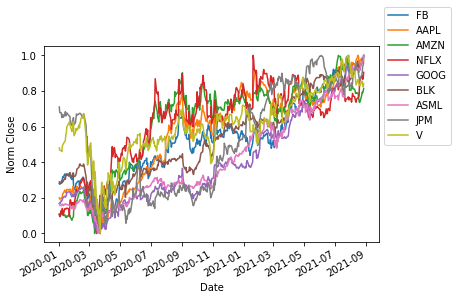

In [6]:
# create a normalized closing price column so we can prepare different stocks
grouper = all_data.groupby('Symbols')['Close']
maxes = grouper.transform('max')
mins = grouper.transform('min')
all_data['Norm Close'] = (all_data.Close - mins)/(maxes - mins)

# plot the closing price
closeplot = sns.lineplot(data=all_data, x='Date', y='Norm Close', hue='Symbols')
closeplot.get_figure().autofmt_xdate()
closeplot.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1);

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
AAPL,417.0,0.001951,0.025047,-0.128647,-0.009167,0.001255,0.014535,0.119808
AMZN,417.0,0.001587,0.021206,-0.079221,-0.009447,0.001882,0.011809,0.079295
ASML,417.0,0.002831,0.028235,-0.173492,-0.010644,0.001954,0.019126,0.116063
BLK,417.0,0.001827,0.025173,-0.136546,-0.008048,0.002676,0.012714,0.135239
FB,417.0,0.001698,0.025258,-0.142530,-0.011879,0.001501,0.014782,0.102350
GOOG,417.0,0.002019,0.021071,-0.111008,-0.006178,0.003021,0.011434,0.094017
JPM,417.0,0.000738,0.028050,-0.149649,-0.011903,0.000145,0.012797,0.180125
NFLX,417.0,0.001611,0.026426,-0.111389,-0.010611,0.001316,0.013876,0.168543
V,417.0,0.000726,0.022578,-0.135472,-0.008819,0.001259,0.010678,0.138426


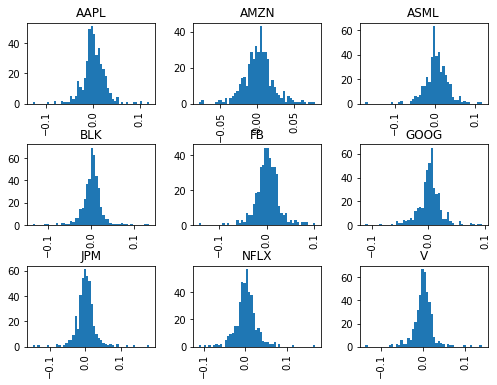

In [7]:
# Plot the distribution of 'Percentage Price Change'
all_data['Closing Price Pct Change'].hist(by=all_data['Symbols'], bins=50, figsize=(8,6))

# Pull up summary statistics table
all_data.groupby('Symbols')['Closing Price Pct Change'].describe()

### 3. Create some helper functions

In [8]:
def pct_change(buy, sell):
    return (sell - buy) / buy

In [9]:
def mean(value, n):
    return value / n

### 4. The signal functions

#### A: Buy one share of each stock in the portfolio at the end of each month

In [10]:
def signal_A(date, df):
    lastdays = list(all_data.groupby([pd.Grouper(key = 'Date', freq = 'M')])['Date'].last())
    if date in lastdays:
        return 'Buy'

#### B: Buy one share of a stock in the portfolio whenever the price falls more than a certain percentage in a single day

In [11]:
def signal_B(pct_change):
    if pct_change < -0.05: # choose your benchmark fall percentage
        return 'Buy'

### 5. Implement the strategies

In [12]:
mydate_A = []
mysymbols_A = []
mypctchange_A = []
myshares_A = []
mytotalshares_A = []
mybuyingprice_A = []
mytotalcost_A = []

for i, row in all_data.iterrows():
    if signal_A(row.Date, all_data) == 'Buy':
        mydate_A.append(row.Date)
        mysymbols_A.append(row.Symbols)
        mypctchange_A.append(row['Closing Price Pct Change'])
        myshares_A.append(1)
        mytotalshares_A.append(sum(myshares_A))
        mybuyingprice_A.append(row['Open'])
        mytotalcost_A.append(sum(mybuyingprice_A))

# create my shares purchasing df
mydf_A = pd.DataFrame({'Date': mydate_A,
                       'Symbols': mysymbols_A,
                       'Closing Price Pct Change': mypctchange_A,
                       'Daily Shares Bought': myshares_A,
                       'Total Shares': mytotalshares_A,
                       'Buying Price': mybuyingprice_A,
                       'Total Cost': mytotalcost_A})

In [13]:
mydate_B = []
mysymbols_B = []
mypctchange_B = []
myshares_B = []
mytotalshares_B = []
mybuyingprice_B = []
mytotalcost_B = []

for i, row in all_data.iterrows():
    if signal_B(row['Closing Price Pct Change']) == 'Buy':
        mydate_B.append(row.Date)
        mysymbols_B.append(row.Symbols)
        mypctchange_B.append(row['Closing Price Pct Change'])
        myshares_B.append(1)
        mytotalshares_B.append(sum(myshares_B))
        mybuyingprice_B.append(row['Open'])
        mytotalcost_B.append(sum(mybuyingprice_B))

# create my shares purchasing df
mydf_B = pd.DataFrame({'Date': mydate_B,
                       'Symbols': mysymbols_B,
                       'Closing Price Pct Change': mypctchange_B,
                       'Daily Shares Bought': myshares_B,
                       'Total Shares': mytotalshares_B,
                       'Buying Price': mybuyingprice_B,
                       'Total Cost': mytotalcost_B})

#### 6. Results

In [14]:
# overall performance evaluation

# A
myavgcost_A = mean(mytotalcost_A[-1], sum(myshares_A))

grpclose_A = all_data.groupby('Symbols')['Close']
weightedclose_A = grpclose_A.tail(1).sum() / len(tickers)
gainloss_A = pct_change(myavgcost_A, weightedclose_A)

print('Strategy A')
print('Total shares bought: ', sum(myshares_A))
print('Average cost: ', myavgcost_A)
print('Total cost:', mytotalcost_A[-1] * 8) # convert to your own currency, mop in this case
print('Gain/Loss pct: {}%'.format(round(gainloss_A*100, 2)))
print('\n')

# B
myavgcost_B = mean(mytotalcost_B[-1], sum(myshares_B))

grpclose_B = all_data.groupby('Symbols')['Close']
weightedclose_B = grpclose_B.tail(1).sum() / len(tickers)
gainloss_B = pct_change(myavgcost_B, weightedclose_B)

print('Strategy B')
print('Total shares bought: ', sum(myshares_B))
print('Average cost: ', myavgcost_B)
print('Total cost:', mytotalcost_B[-1] * 8) # convert to your own currency, mop in this case
print('Gain/Loss pct: {}%'.format(round(gainloss_B*100, 2)))

Strategy A
Total shares bought:  180
Average cost:  791.060668097602
Total cost: 1139127.3620605469
Gain/Loss pct: 33.5%


Strategy B
Total shares bought:  85
Average cost:  544.0770479538861
Total cost: 369972.3926086426
Gain/Loss pct: 94.1%


#### Bottom line: To buy the stocks only when their prices rapidly fall outperform to buy the shares at the end of each month.